# Multiclass Classification
In this notebook, I will embark on a mini project focusing on multiclass classification. While I have previously explored binary classification, distinguishing between red and blue circles, this time I face a more complex task with multiple classes of items.

Imagine a fashion company seeking to develop a neural network capable of predicting whether a given piece of clothing is a shoe, a shirt, or a jacket. Such a scenario involves three distinct classes, making it a multiclass classification problem.

The good news is that I can build upon the knowledge I have gained so far and make necessary adjustments to tackle multiclass classification challenges.

To get started, I need some data, and fortunately, TensorFlow offers a built-in multiclass classification dataset called Fashion MNIST, which will serve as my foundation for this project.

I can easily import this dataset using the tf.keras.datasets module.

📖 Resource: The inspiration for this multiclass classification problem comes from the TensorFlow classification guide. As an additional exercise, I may wish to replicate the TensorFlow guide after working through this example.

In machine learning and statistical classification, multiclass classification or multinomial classification is the problem of classifying instances into one of three or more classes

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## **Fashion MNIST**

An MNIST-like dataset of 70,000 28x28 labeled fashion images

**About Dataset**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

**Content**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image

**Labels**

Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [3]:
# The first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# Check the shape
train_data[0].shape, train_labels[0].shape

((28, 28), ())

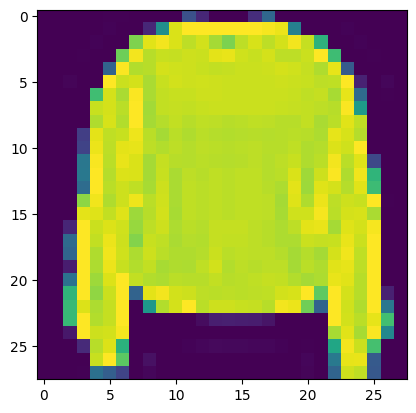

In [5]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [6]:
# Check our samples label
train_labels[7]

2

In [7]:
# Create a small list to index on to the training labels so that they're human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Coat", "Sandal", "Shirt" "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Trouser')

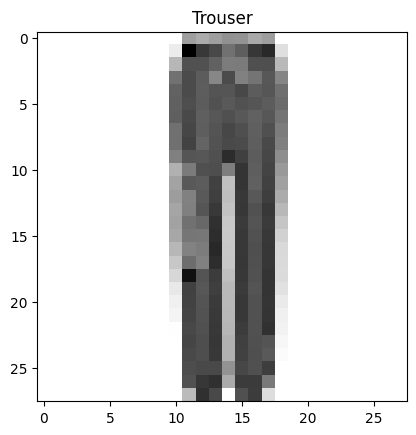

In [8]:
# Plot and example image and its label
index_of_choice = 1000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

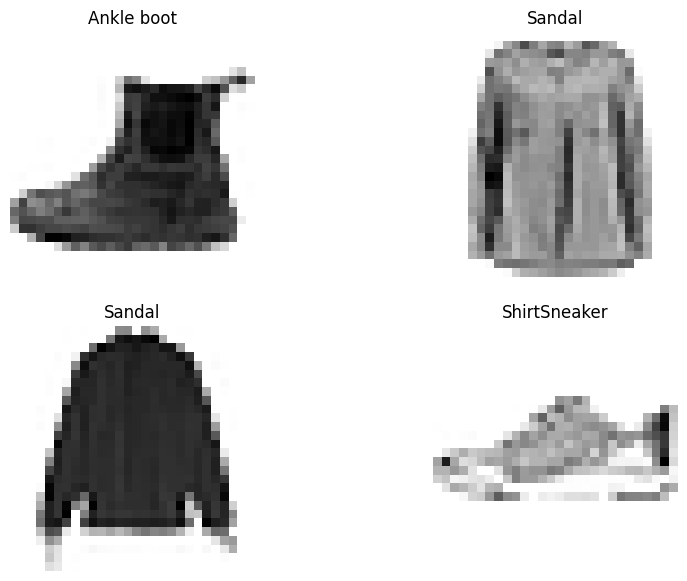

In [9]:
# Plot multiple randon images of MNIST
import random
plt.figure(figsize=(10,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

# Building a Multiclass classification Model

Though similar to the binary architecture, there are a few tweaks:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = Softmax

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])

# Compile the model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
non_norm_history = model_1.fit(train_data, train_labels, epochs =10, validation_data=(test_data, test_labels))

Epoch 1/10


ValueError: ignored

The model is not working because the shapes are icompatible.A neural operates on images being one long vector. To solve this, use flatten

See the example below of how Flatten works

In [11]:
flatten = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten.output_shape

(None, 784)

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])

# Compile the model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
non_norm_history = model_1.fit(train_data, train_labels, epochs =10, validation_data=(test_data, test_labels))

Epoch 1/10


ValueError: ignored

The problem above results from the loss function being used. There are two types of loss functions and are dependent on how the data formated
1. If it is one-hot-encoded  = Use categorical_crossentropy
2. If it is a representation of Integers = Use sparse_categorical_crossentropy

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1A = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1A.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_history = model_1A.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5923 - accuracy: 0.1150 - val_loss: 2.2327 - val_accuracy: 0.1334
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1928 - accuracy: 0.1479 - val_loss: 2.1053 - val_accuracy: 0.1816
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8589 - accuracy: 0.2103 - val_loss: 1.7503 - val_accuracy: 0.2055
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7076 - accuracy: 0.2616 - val_loss: 1.6719 - val_accuracy: 0.2747
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6508 - accuracy: 0.2873 - val_loss: 1.6319 - val_accuracy: 0.2850
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6242 - accuracy: 0.2896 - val_loss: 1.6165 - val_accuracy: 0.2848
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6095 - accuracy: 0.2910 - val_loss: 1.6052 - val_accuracy:

In [14]:
# Using categorical cross entropy
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1B = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1B.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_1B.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10))) # see how the model performs on the t

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2529 - accuracy: 0.1286 - val_loss: 2.0441 - val_accuracy: 0.2273
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7852 - accuracy: 0.2404 - val_loss: 1.6531 - val_accuracy: 0.2710
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6095 - accuracy: 0.2730 - val_loss: 1.5875 - val_accuracy: 0.2735
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5326 - accuracy: 0.3108 - val_loss: 1.5207 - val_accuracy: 0.3066
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4906 - accuracy: 0.3387 - val_loss: 1.4958 - val_accuracy: 0.3294
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4365 - accuracy: 0.3738 - val_loss: 1.3998 - val_accuracy: 0.4113
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3752 - accuracy: 0.4153 - val_loss: 1.3871 - val_accuracy:

In [15]:
# Check the model summary
model_1A.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled: Ways of scaling data include:
1. **Min-max normalization** retains the original distribution of scores except for a scaling factor and transforms all the scores into a common range [0, 1]. However, this method is not robust (i.e., the method is highly sensitive to outliers.

2. **Standardization (Z-score normalization)** The most commonly used technique, which is calculated using the arithmetic mean and standard deviation of the given data. However, both mean and standard deviation are sensitive to outliers, and this technique does not guarantee a common numerical range for the normalized scores. Moreover, if the input scores are not Gaussian distributed, this technique does not retain the input distribution at the output.

3. **Median and MAD:** The median and median absolute deviation (MAD) are insensitive to outliers and the points in the extreme tails of the distribution. therefore it is robust. However, this technique does not retain the input distribution and does not transform the scores into a common numerical range.

4. **tanh-estimators:** The tanh-estimators introduced by Hampel et al. are robust and highly efficient. The normalization is given by tanh estimators where μGH and σGH are the mean and standard deviation estimates, respectively, of the genuine score distribution as given by Hampel estimators.

In [17]:
# Get training data and testing data scaled between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values  of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [18]:
# Now our data is normalized, let'build a model to find patterns

# Set random seed
tf.random.set_seed(42)

# Create the model
model_1B = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1B.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_1B.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2088 - accuracy: 0.5400 - val_loss: 0.9184 - val_accuracy: 0.6132
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8729 - accuracy: 0.6295 - val_loss: 0.8593 - val_accuracy: 0.6333
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8332 - accuracy: 0.6400 - val_loss: 0.8361 - val_accuracy: 0.6386
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8166 - accuracy: 0.6474 - val_loss: 0.8502 - val_accuracy: 0.6307
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8061 - accuracy: 0.6518 - val_loss: 0.8143 - val_accuracy: 0.6533
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7850 - accuracy: 0.6735 - val_loss: 0.7780 - val_accuracy: 0.6897
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7458 - accuracy: 0.6958 - val_loss: 0.7574 - val_accuracy:

The accuracy shot up from 34% to 79 %.
The trick was just to normalize the data. The best way to see the difference is to visualize

<Axes: title={'center': 'Normalized_data'}>

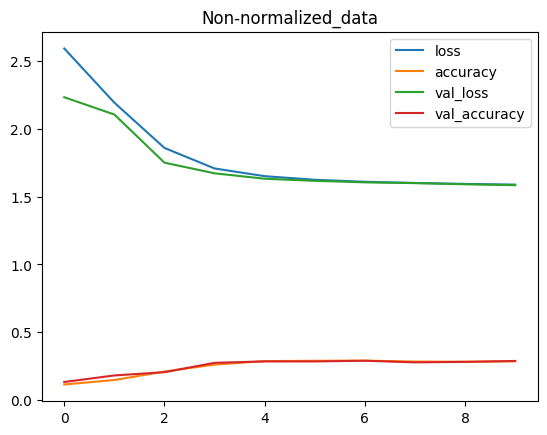

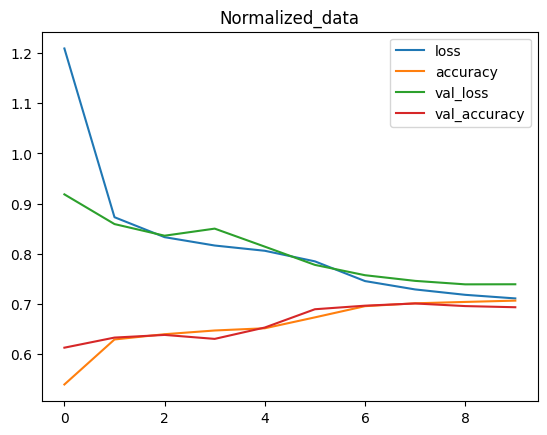

In [19]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_history.history).plot(title="Non-normalized_data",)

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized_data")

When comparing results,  the same model even with *slightly* different data can produce *dramatically* different results. So when comparing models, it is important to compare the on the same criteria(eg. same architecture but different data or same data but different data)

# Finding the ideal learning rate

In [20]:
# Set random_seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create the learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3* 10**(epoch/20))

# Fit the model
find_lr_history = model_2.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_schedular])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8488 - accuracy: 0.2731 - val_loss: 1.2571 - val_accuracy: 0.5053 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1146 - accuracy: 0.5613 - val_loss: 1.0525 - val_accuracy: 0.5969 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9924 - accuracy: 0.6087 - val_loss: 0.9753 - val_accuracy: 0.6284 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8943 - accuracy: 0.6637 - val_loss: 0.8961 - val_accuracy: 0.6621 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8356 - accuracy: 0.6750 - val_loss: 0.8459 - val_accuracy: 0.6766 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8047 - accuracy: 0.6822 - val_loss: 0.8337 - val_accuracy: 0.6840 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

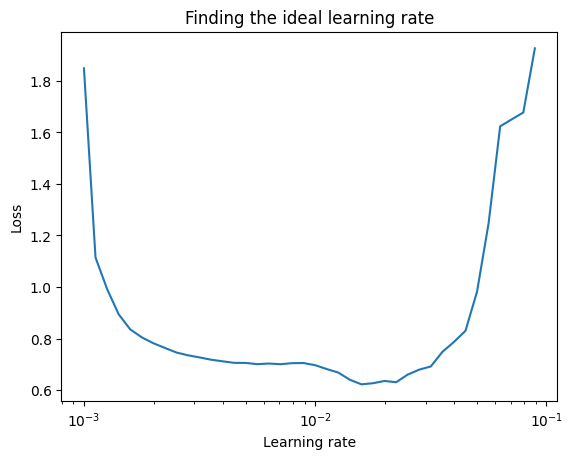

In [21]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [22]:
10**-3

0.001

In [23]:
from keras.api._v2.keras import metrics
# Refit the model with the ideal learning rate

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_3.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fithe the model
history_3 = model_3.fit(train_data_norm,
            train_labels,
            epochs=20,
            validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2442 - accuracy: 0.5224 - val_loss: 0.8805 - val_accuracy: 0.6314
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7962 - accuracy: 0.7147 - val_loss: 0.8059 - val_accuracy: 0.7224
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7240 - accuracy: 0.7477 - val_loss: 0.7315 - val_accuracy: 0.7479
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6838 - accuracy: 0.7594 - val_loss: 0.7014 - val_accuracy: 0.7572
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6590 - accuracy: 0.7665 - val_loss: 0.7009 - val_accuracy: 0.7570
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6414 - accuracy: 0.7721 - val_loss: 0.6782 - val_accuracy: 0.7653
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6242 - accuracy: 0.7814 - val_loss: 0.6791 - val_accuracy:

## Evaluating the model
To evaluate  the model:
* Evaluate its performance using other metrics such as confusion matrix
* Asses some of its predictions through visualizations
* Improve its results by training for longer or changing the architecture
* Save and export for use in application

In [55]:
# Create a confusion matrix
import itertools


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=10)


In [26]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Coat',
 'Sandal',
 'ShirtSneaker',
 'Bag',
 'Ankle boot']

In [27]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [30]:
# Make some predictions
y_probs= model_3.predict(test_data) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.99999994, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99999994, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.99999994, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.99999994, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

The  above model predicted on the wrong data. To correct this use test_data_norm. This is because the model was trained on normalized data. It is a good practice to use the same data type on models as wel as predictions

In [31]:
y_probs = model_3.predict(test_data_norm)

313/313 [==============================] - 1s 3ms/step


In [34]:
y_probs[0], tf.argmax(y_probs[0])

(array([3.1506416e-04, 1.7286135e-05, 1.1385839e-06, 1.1280498e-03,
        3.3579690e-05, 2.7352557e-01, 2.6442111e-04, 1.2805082e-01,
        1.1432945e-02, 5.8523101e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [35]:
# Getting the class name
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([3.1506416e-04, 1.7286135e-05, 1.1385839e-06, 1.1280498e-03,
        3.3579690e-05, 2.7352557e-01, 2.6442111e-04, 1.2805082e-01,
        1.1432945e-02, 5.8523101e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [36]:
# Coverting all the  prediction probabilities into integers
y_preds= y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [39]:
# Creaing  confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[779,   4,  28,  74,   2,   5,  95,   0,  13,   0],
       [  2, 950,  10,  30,   3,   0,   4,   0,   1,   0],
       [ 24,   3, 687,  11, 171,   1,  96,   0,   7,   0],
       [ 31,  16,  13, 852,  36,   2,  43,   0,   7,   0],
       [  1,   1, 100,  35, 780,   0,  70,   0,  13,   0],
       [  0,   0,   0,   1,   0, 919,   0,  38,   7,  35],
       [158,   4, 103,  45, 132,   2, 530,   0,  26,   0],
       [  0,   0,   0,   0,   0,  48,   0, 918,   1,  33],
       [  2,   1,   2,   8,  14,  11,  17,   5, 940,   0],
       [  0,   0,   0,   0,   0,  31,   0,  43,   1, 925]])

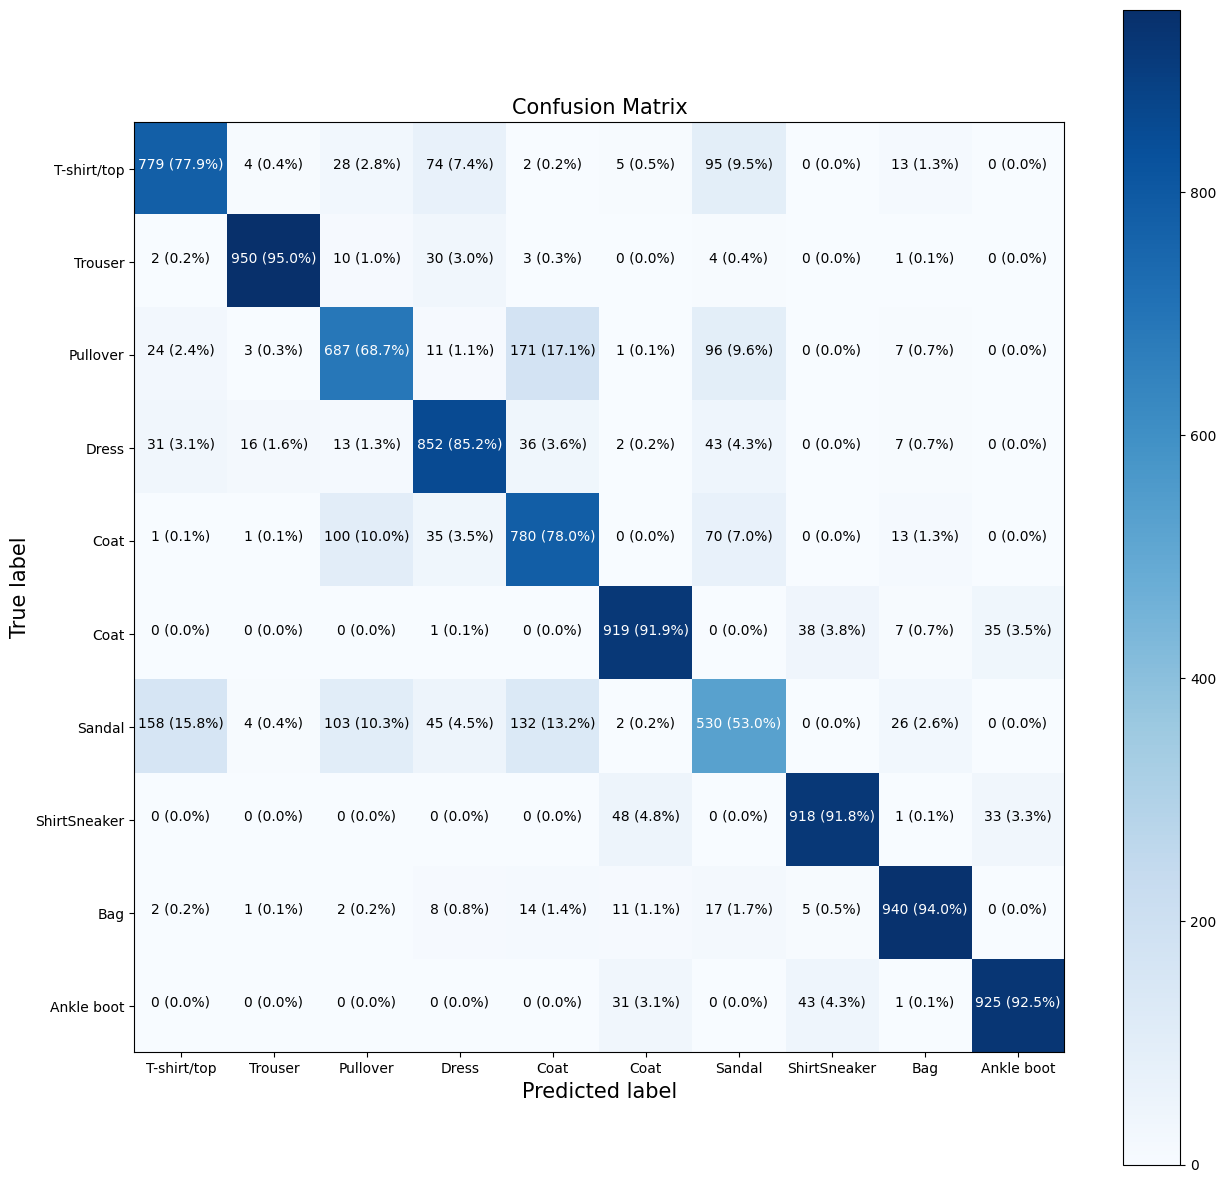

In [56]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),)

###Develop a futher understanding of the data  and the inputs and outputs of the model

Create a function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and the predicted label

In [65]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 71ms/step


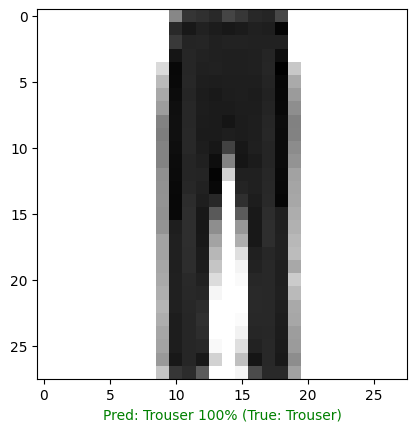

In [68]:
# Check out a random image as well as its prediction
plot_random_image(model=model_3,
                  images=test_data_norm,# Always test the data on the same type the model was trained on
                  true_labels=test_labels,
                  classes=class_names)

After running the cell above a few times you'll start to get a visual understanding of the relationship between the model's predictions and the true labels and  figure out which predictions the model gets confused on?

It seems to mix up classes which are similar, for example, Sneaker with Ankle boot.

Looking at the images, you can see how this might be the case.

The overall shape of a Sneaker and an Ankle Boot are similar.

The overall shape might be one of the patterns the model has learned and so therefore when two images have a similar shape, their predictions get mixed up.

## What patterns exactly is the model learning?

In [70]:
# Find the layers of the most previous model
model_3.layers

In [72]:
# Etract any layer
model_3.layers[1]

Find the patterns learned by a particular layer using the get_weights() method.

The get_weights() method returns the weights (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.

In [74]:
# Get the patterns of a layer in our network
weights, biases = model_3.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.38961613,  0.80110806, -0.49417892,  0.58819705],
        [ 1.3358568 ,  0.44603273, -1.2771398 ,  0.44197756],
        [ 0.6394624 ,  0.21882704, -0.81246185,  0.42099822],
        ...,
        [ 0.2469691 ,  0.10062575,  0.07234734, -0.35804665],
        [ 0.2237502 , -0.5606236 ,  0.45396265, -0.33475208],
        [ 0.34792012,  0.3078936 ,  0.1802526 ,  0.80489266]],
       dtype=float32),
 (784, 4))

In [75]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


The bias vector.....

In [76]:
# Bias and baises shapes
biases, biases.shape

(array([ 0.8651139 ,  1.8296069 , -0.04023228,  1.0452359 ], dtype=float32),
 (4,))

**Weights** set the standards for the neuron's signal strength. This value will determine the influence input data has on the output product.

**Biases** give extra characteristics with a value of 1 that the neural network did not previously have. The neural network needs that extra information to efficiently propagate forward.

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [77]:
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


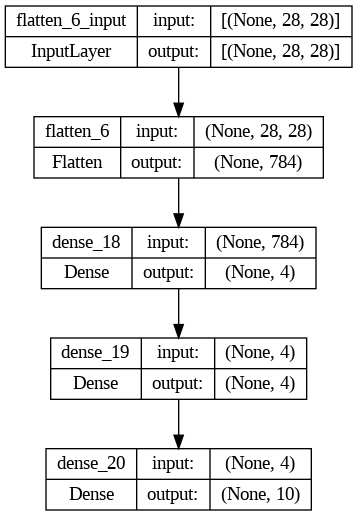

In [80]:
# Another way to view  the deep learing model
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layers
plot_model(model_3, show_shapes=True)